Generating univariate visualizations...


C:\Users\thann\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


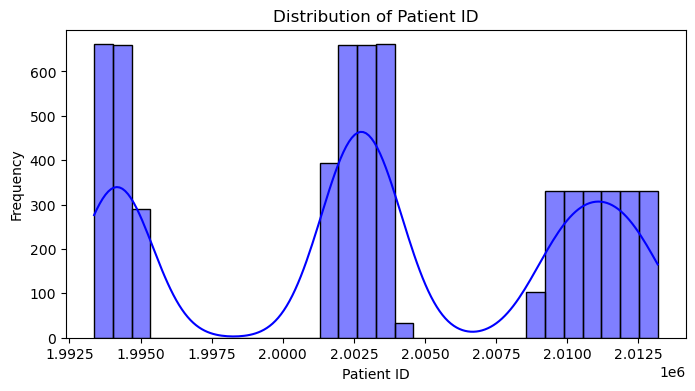

C:\Users\thann\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


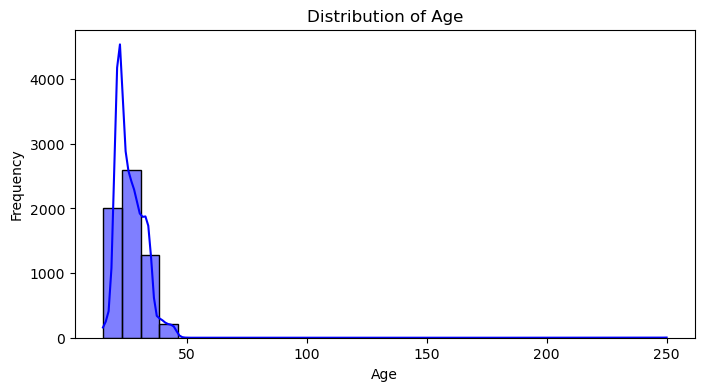

C:\Users\thann\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


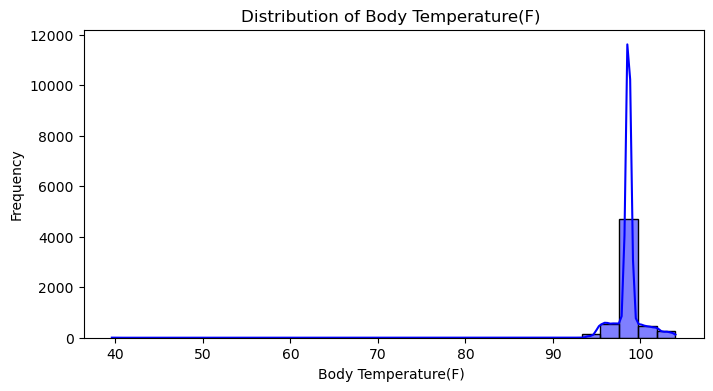

C:\Users\thann\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


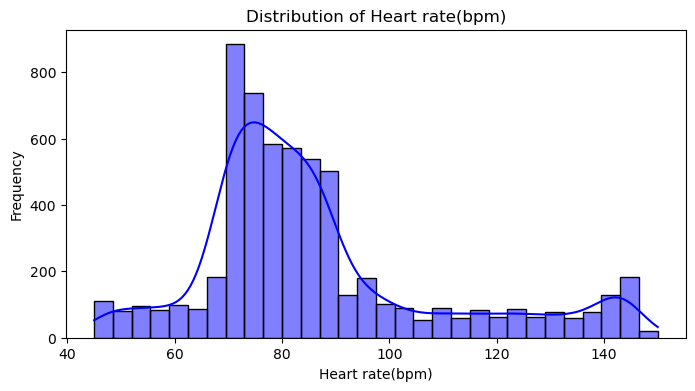

C:\Users\thann\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


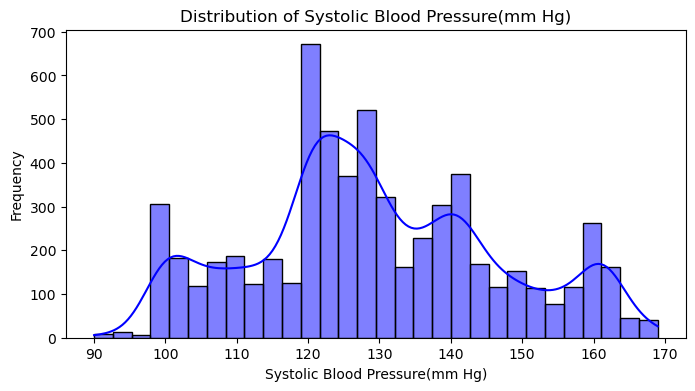

C:\Users\thann\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


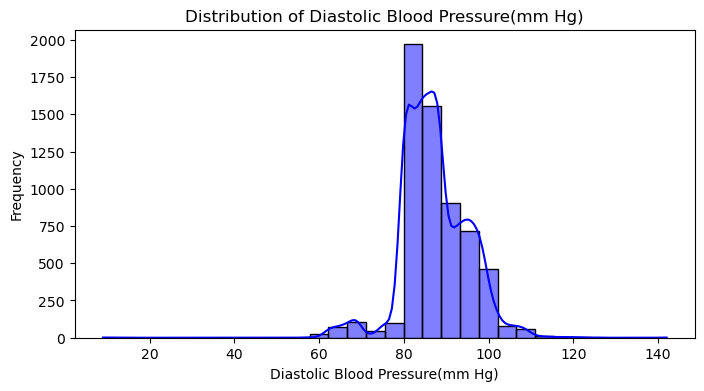

C:\Users\thann\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


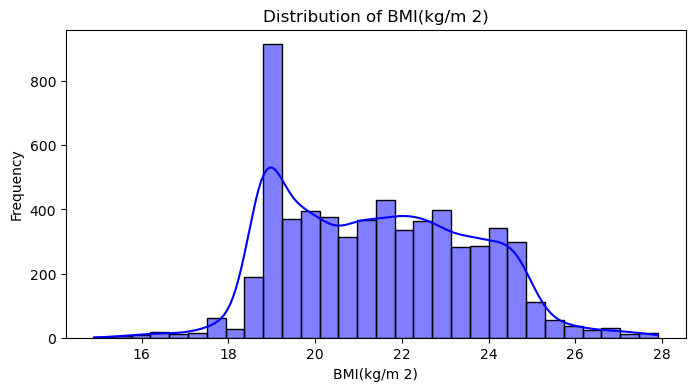

C:\Users\thann\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


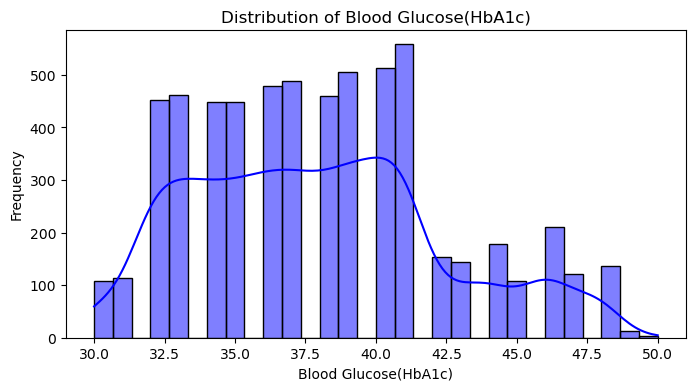

C:\Users\thann\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


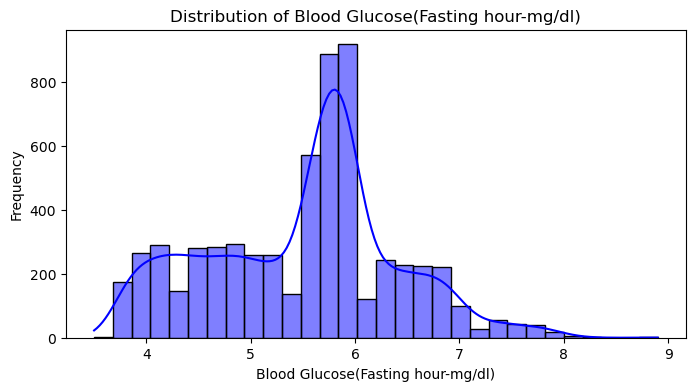

C:\Users\thann\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


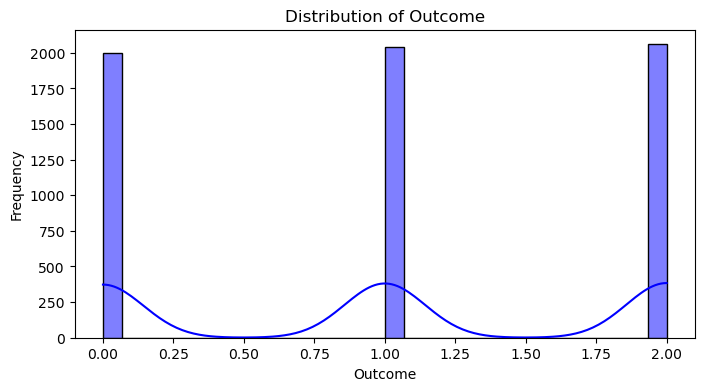

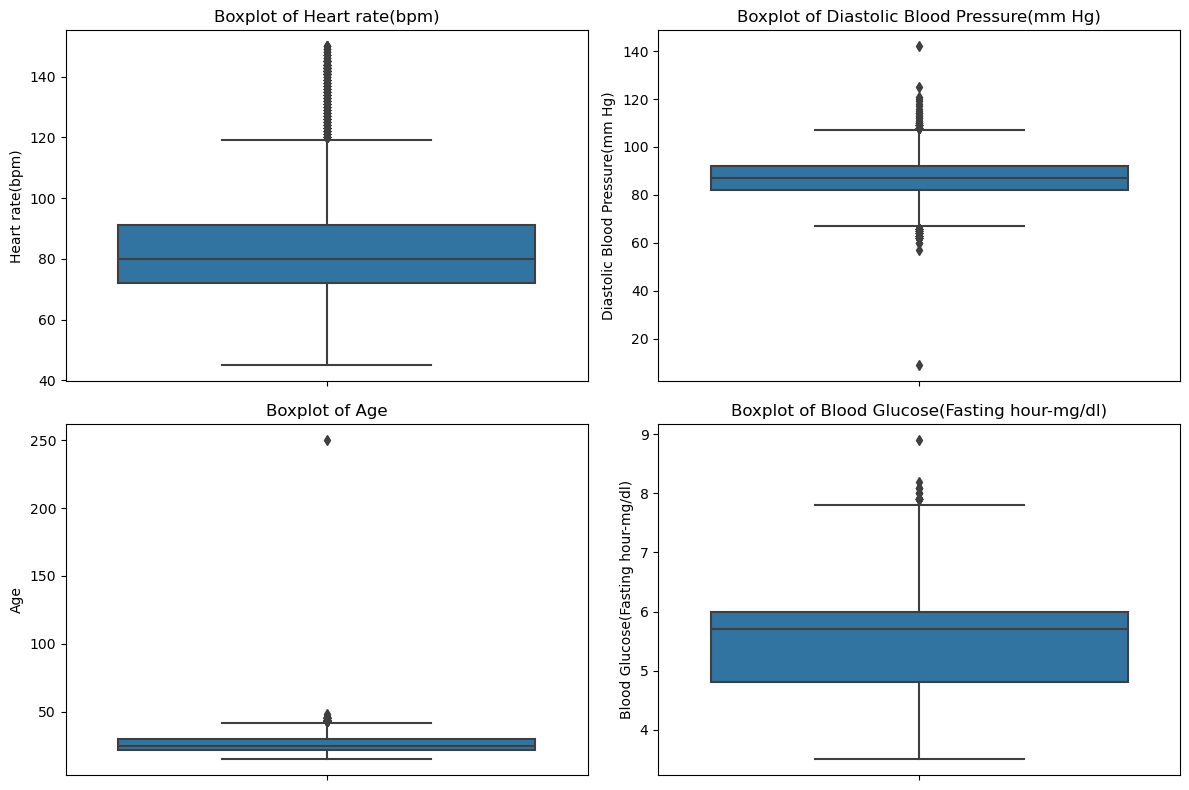

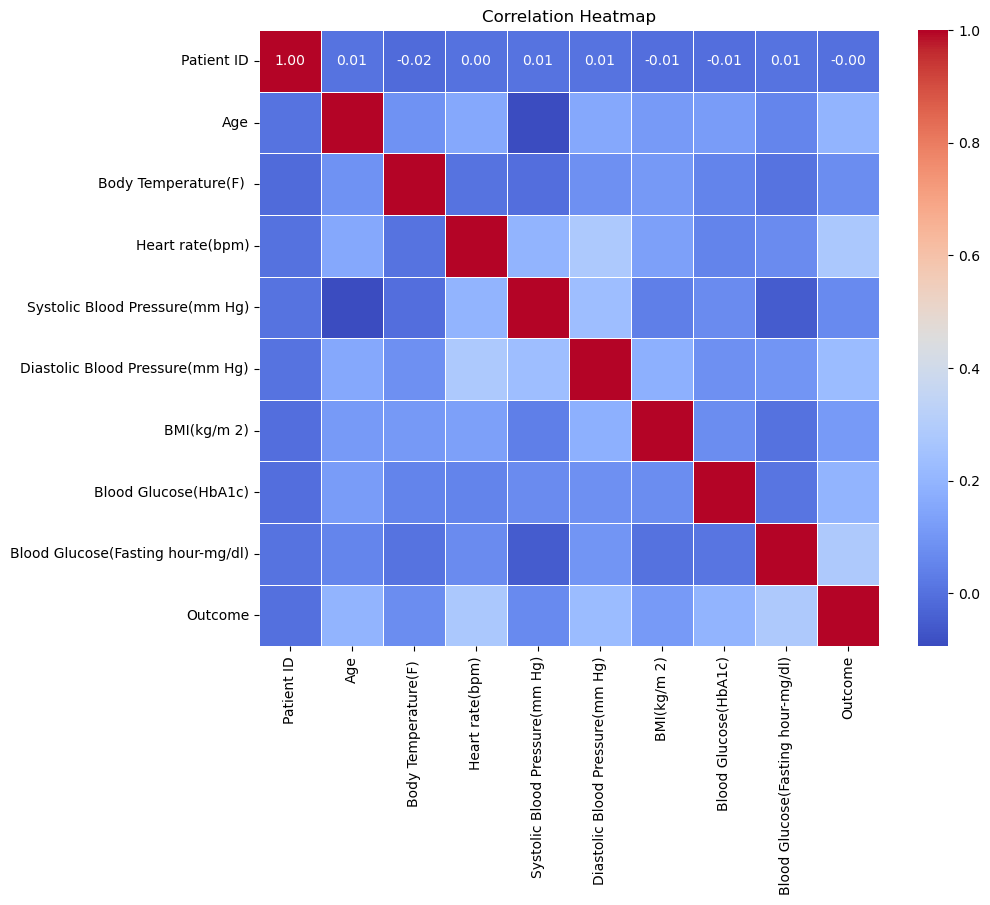

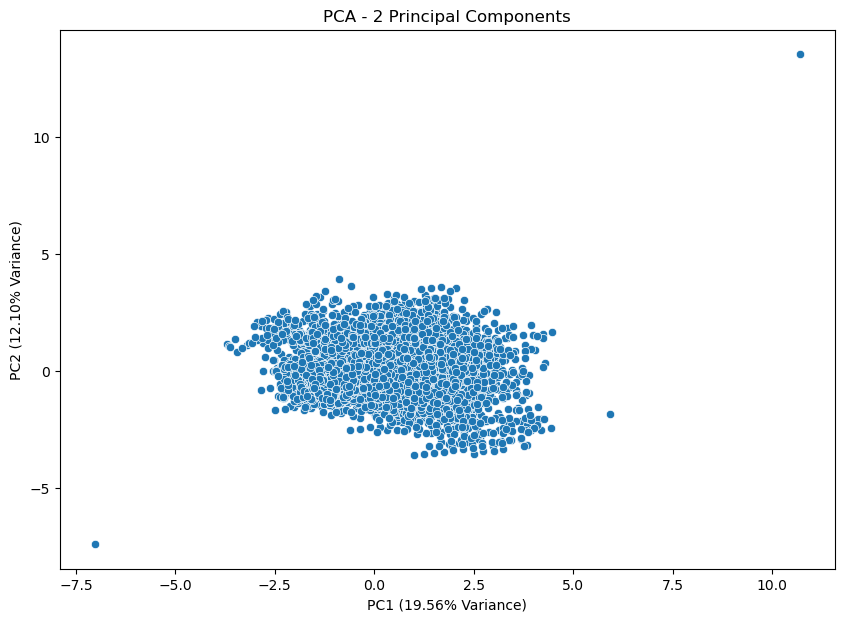

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the CSV file into a DataFrame
df = pd.read_csv(r"pregnancy risk prediction data set.csv", encoding='ISO-8859-1')

# Check if the "Name" column exists and drop it if present
if 'Name' in df.columns:
    df = df.drop(columns=['Name'])

if 'Outcome' in df.columns:
    outcome_mapping = {
        "low risk": 0,
        "mid risk": 1,
        "high risk": 2
    }
    df['Outcome'] = df['Outcome'].map(outcome_mapping)
    unique_outcome_values = {v: k for k, v in outcome_mapping.items()}  # Reverse mapping for interpretation

# Remove rows where age > 100
if 'age' in df.columns:
    df = df[df['age'] <= 100]

# Univariate Visualization
def univariate_visualizations(df):
    print("Generating univariate visualizations...")
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            plt.figure(figsize=(8, 4))
            sns.histplot(df[column], kde=True, bins=30, color='blue')
            plt.title(f"Distribution of {column}")
            plt.xlabel(column)
            plt.ylabel("Frequency")
            plt.show()
        elif df[column].dtype == 'object':
            plt.figure(figsize=(8, 4))
            sns.countplot(x=df[column], palette="viridis")
            plt.title(f"Count of {column}")
            plt.xlabel(column)
            plt.ylabel("Count")
            plt.xticks(rotation=45)
            plt.show()
# Call the visualization functions
univariate_visualizations(df)

# Columns for which we want boxplots
boxplot_columns = ['Heart rate(bpm)', 'Diastolic Blood Pressure(mm Hg)', 'Age', 'Blood Glucose(Fasting hour-mg/dl)']

# Plotting boxplots for each specified column
plt.figure(figsize=(12, 8))
for i, column in enumerate(boxplot_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# PCA analysis for dimensionality reduction visualization
# Standardizing the data
features = df.select_dtypes(include=[np.number]).columns.tolist()  # Selecting numeric columns
x = df[features].values
x = StandardScaler().fit_transform(x)

# Applying PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plotting PCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2')
plt.title('PCA - 2 Principal Components')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)')
plt.show()


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from xgboost import XGBClassifier

# Load the CSV file into a DataFrame
df = pd.read_csv(r"pregnancy risk prediction data set.csv", encoding='ISO-8859-1')

# Clean column names to remove trailing spaces
df.columns = df.columns.str.strip()

# Drop unnecessary columns
if 'Patient ID' in df.columns:
    df = df.drop(columns=['Patient ID'])
if 'Name' in df.columns:
    df = df.drop(columns=['Name'])

# Explicit mapping of outcomes to numeric values
if 'Outcome' in df.columns:
    outcome_mapping = {
        "low risk": 0,
        "mid risk": 1,
        "high risk": 2
    }
    df['Outcome'] = df['Outcome'].map(outcome_mapping)
    unique_outcome_values = {v: k for k, v in outcome_mapping.items()}  # Reverse mapping for interpretation

# Remove rows where Age > 100
if 'Age' in df.columns:
    df = df[df['Age'] <= 100]

# Separating features and target variable
X = df.drop(columns=['Outcome']) if 'Outcome' in df.columns else df
y = df['Outcome'] if 'Outcome' in df.columns else None

# Normalize features using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Stratified k-Fold Cross-Validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Hyperparameter tuning for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [5, 7],               
    'learning_rate': [0.01, 0.1],    
    'subsample': [0.8, 1.0],             
    'colsample_bytree': [0.8, 1.0],      
    'reg_lambda': [1, 10],                 
    'reg_alpha': [0, 0.1]                
}


# Initialize and train the model using GridSearchCV
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=kf, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_normalized, y)

# Extract the best model
best_xgb = grid_search.best_estimator_
print("Best Parameters for XGBoost:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Model Evaluation
y_pred = best_xgb.predict(X_normalized)

# Compute Metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')

# Print Metrics
print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y, y_pred, target_names=[unique_outcome_values[i] for i in sorted(unique_outcome_values)]))



Fitting 10 folds for each of 192 candidates, totalling 1920 fits


C:\Users\thann\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:35:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.9927882267714845

Model Performance Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

    low risk       1.00      1.00      1.00      2000
    mid risk       1.00      1.00      1.00      2043
   high risk       1.00      1.00      1.00      2059

    accuracy                           1.00      6102
   macro avg       1.00      1.00      1.00      6102
weighted avg       1.00      1.00      1.00      6102



In [10]:
import shap
import pandas as pd
import numpy as np

def explain_prediction_with_shap(model, input_data, scaler, X_columns, top_k=3):
    """
    Explain the prediction using SHAP values, highlight abnormal features,
    and provide user-friendly insights for pregnant patients.

    Args:
    - model: Trained machine learning model.
    - input_data: User input data as a dictionary.
    - scaler: Pre-fitted scaler used to normalize input data.
    - X_columns: List of feature names in the training data.
    - top_k: Number of top features to highlight in the explanation.

    Returns:
    - explanation (str): Detailed explanation of the prediction and feature contributions.
    """
    # Define sensible ranges for features for pregnant patients
    sensible_ranges = {
        "Age": (18, 45),  # Reproductive age range
        "Body Temperature(F)": (95, 104),  # Normal temperature range
        "Heart rate(bpm)": (70, 110),  # Elevated heart rate during pregnancy
        "Systolic Blood Pressure(mm Hg)": (90, 130),  # Adjusted systolic BP range
        "Diastolic Blood Pressure(mm Hg)": (60, 85),  # Adjusted diastolic BP range
        "BMI(kg/m 2)": (18.5, 30),  # Normal BMI to overweight range
        "Blood Glucose(HbA1c)": (4, 6),  # Normal HbA1c range
        "Blood Glucose(Fasting hour-mg/dl)": (60, 95)  # Pregnancy fasting glucose range
    }

    # Convert input data to DataFrame for processing
    input_df = pd.DataFrame([input_data])
    input_df.columns = input_df.columns.str.strip()  # Clean column names

    # Normalize the input data
    input_normalized = scaler.transform(input_df)

    # Initialize SHAP explainer
    explainer = shap.TreeExplainer(model)
    shap_values = explainer(input_normalized)

    # Extract SHAP values and pair with feature data
    shap_values_array = shap_values.values.flatten()
    feature_impact = sorted(
        zip(X_columns, input_df.iloc[0].values, shap_values_array),
        key=lambda x: abs(x[2]),
        reverse=True
    )

    # Generate prediction and explanation
    prediction = model.predict(input_normalized)[0]
    explanation = f"\nPrediction Analysis:\nThe predicted outcome is **{prediction:.2f}**.\n"
    explanation += "Key contributing features:\n"

    for i, (feature, value, impact) in enumerate(feature_impact[:top_k]):
        # Check if the feature value is abnormal
        if feature in sensible_ranges:
            lower, upper = sensible_ranges[feature]
            if not (lower <= value <= upper):
                abnormality = f" (Abnormal: Out of range {lower} - {upper})"
            else:
                abnormality = ""
        else:
            abnormality = ""

        # Use absolute value for impact in explanation
        explanation += f"{i+1}. **{feature}**: Value = {value}{abnormality}, Impact = {abs(impact):.2f}.\n"

    # Add explanation of impact
    explanation += "\nNote:\n"
    explanation += (
        "The 'Impact' value indicates how much a feature influenced the prediction.\n"
        "- Higher values indicate greater influence, regardless of direction.\n"
        "- Features marked as 'Abnormal' are outside the sensible range."
    )

    return explanation


# Input Prompt for User
print("\nPregnancy Health Prediction System")
print("Please enter the following details for prediction:")

# Collect user input for pregnant patients
user_input = {
    "Age": float(input("Age: ")),
    "Body Temperature(F)": float(input("Body Temperature (F): ")),
    "Heart rate(bpm)": float(input("Heart Rate (bpm): ")),
    "Systolic Blood Pressure(mm Hg)": float(input("Systolic Blood Pressure (mm Hg): ")),
    "Diastolic Blood Pressure(mm Hg)": float(input("Diastolic Blood Pressure (mm Hg): ")),
    "BMI(kg/m 2)": float(input("BMI (kg/m^2): ")),
    "Blood Glucose(HbA1c)": float(input("Blood Glucose (HbA1c): ")),
    "Blood Glucose(Fasting hour-mg/dl)": float(input("Blood Glucose (Fasting hour-mg/dl): "))
}

# Process and normalize input
user_df = pd.DataFrame([user_input])
user_df.columns = user_df.columns.str.strip()  # Clean column names
user_normalized = scaler.transform(user_df)

# Predict outcome using the trained model
predicted_outcome = best_xgb.predict(user_normalized)
predicted_class = unique_outcome_values[predicted_outcome[0]]
print(f"\nPredicted Outcome: {predicted_class}\n")

# Generate SHAP-based explanation
print("\nAnalyzing Prediction:")
explanation = explain_prediction_with_shap(
    model=best_xgb,
    input_data=user_input,
    scaler=scaler,
    X_columns=[
        "Age", "Body Temperature(F)", "Heart rate(bpm)",
        "Systolic Blood Pressure(mm Hg)", "Diastolic Blood Pressure(mm Hg)",
        "BMI(kg/m 2)", "Blood Glucose(HbA1c)", "Blood Glucose(Fasting hour-mg/dl)"
    ],
    top_k=3
)
print(explanation)



Pregnancy Health Prediction System
Please enter the following details for prediction:


Age:  16
Body Temperature (F):  98
Heart Rate (bpm):  65
Systolic Blood Pressure (mm Hg):  120
Diastolic Blood Pressure (mm Hg):  80
BMI (kg/m^2):  28
Blood Glucose (HbA1c):  41
Blood Glucose (Fasting hour-mg/dl):  5.8



Predicted Outcome: high risk


Analyzing Prediction:

Prediction Analysis:
The predicted outcome is **2.00**.
Key contributing features:
1. **Heart rate(bpm)**: Value = 65.0 (Abnormal: Out of range 70 - 110), Impact = 2.52.
2. **Blood Glucose(HbA1c)**: Value = 41.0 (Abnormal: Out of range 4 - 6), Impact = 1.99.
3. **Systolic Blood Pressure(mm Hg)**: Value = 120.0, Impact = 1.39.

Note:
The 'Impact' value indicates how much a feature influenced the prediction.
- Higher values indicate greater influence, regardless of direction.
- Features marked as 'Abnormal' are outside the sensible range.
